In [22]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [105]:
file_path = "/content/drive/My Drive/ML/archive/PS4_GamesSales.csv"
df1 = pd.read_csv(file_path, encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

print(df1.head(10))

                             Game    Year             Genre                       Publisher  North America  Europe  Japan  Rest of World  Global
0              Grand Theft Auto V  2014.0            Action                  Rockstar Games           6.06    9.71   0.60           3.02   19.39
1       Call of Duty: Black Ops 3  2015.0           Shooter                      Activision           6.18    6.05   0.41           2.44   15.09
2           Red Dead Redemption 2  2018.0  Action-Adventure                  Rockstar Games           5.26    6.21   0.21           2.26   13.94
3              Call of Duty: WWII  2017.0           Shooter                      Activision           4.67    6.21   0.40           2.12   13.40
4                         FIFA 18  2017.0            Sports                       EA Sports           1.27    8.64   0.15           1.73   11.80
5                         FIFA 17  2016.0            Sports                 Electronic Arts           1.26    7.95   0.12         

Пытался проанализировать взаимосвязь количества продаж с жанром игр относительно регионов. Из диаграмм видно, что существует топ-5 жанров - лидеров продаж. Во всех регионах этот топ-5 одинаковый. Чтобы это понять дополнитнльной аналитики не потребовалось.


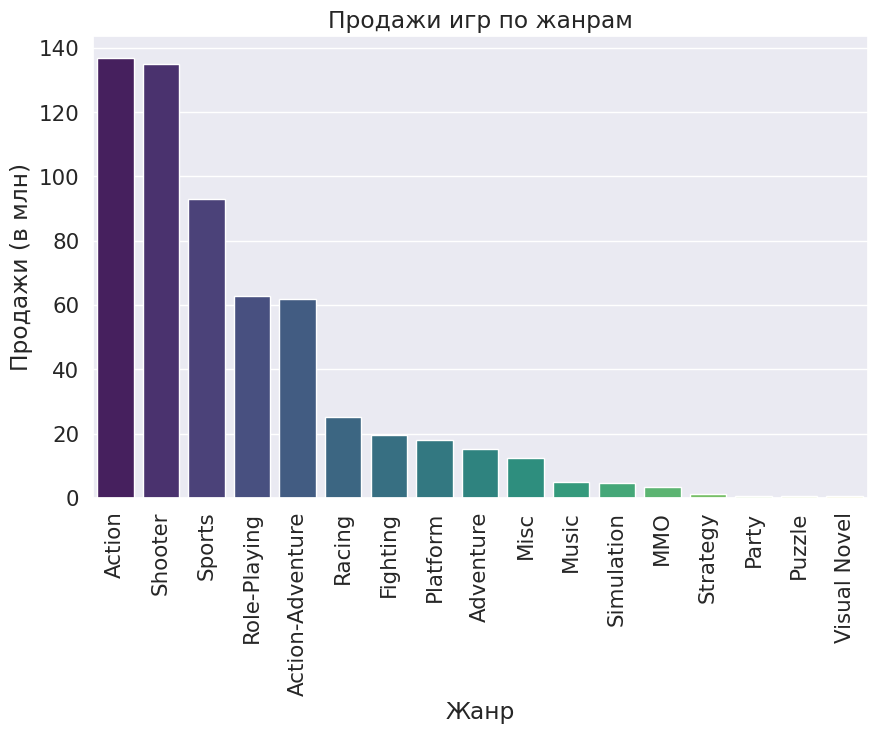

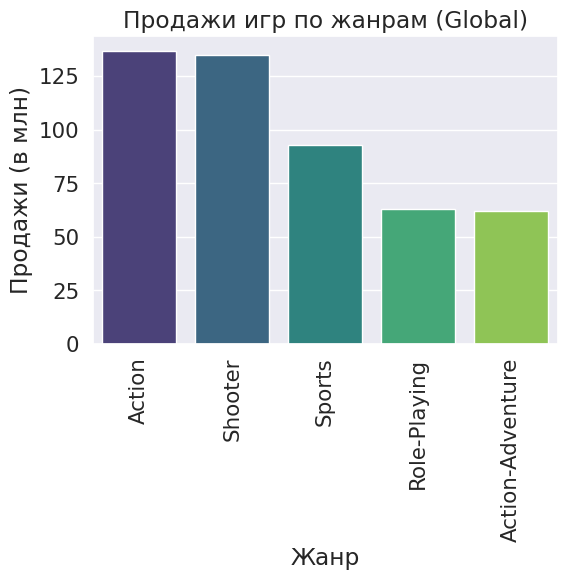

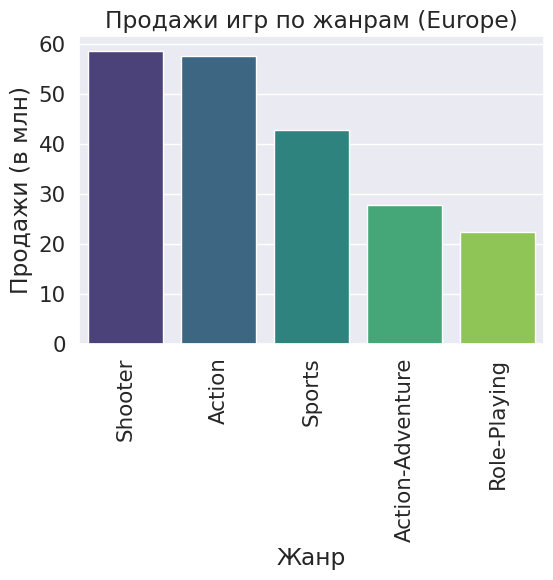

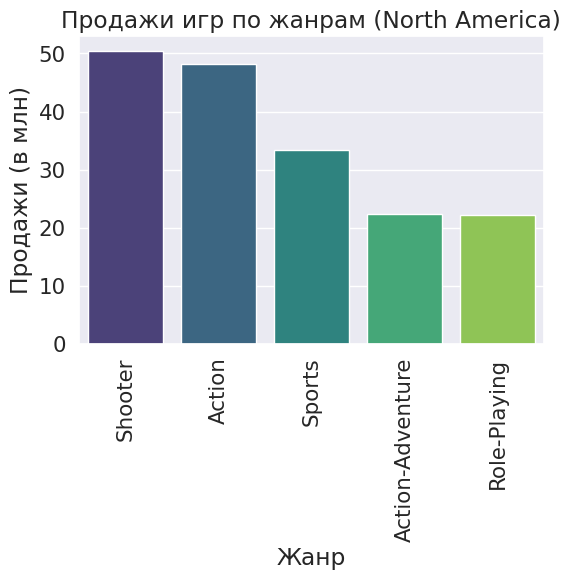

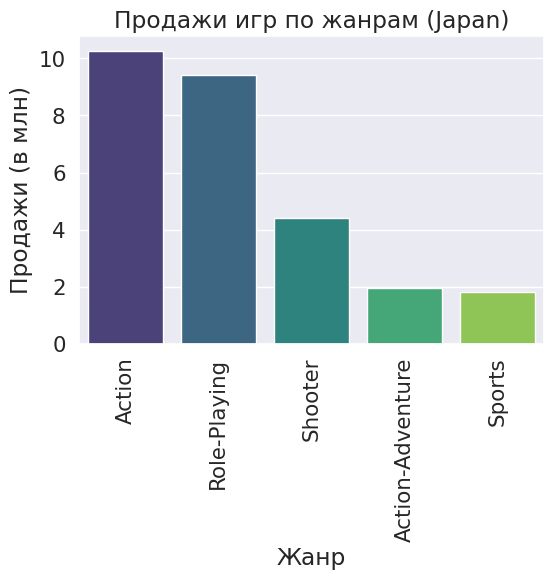

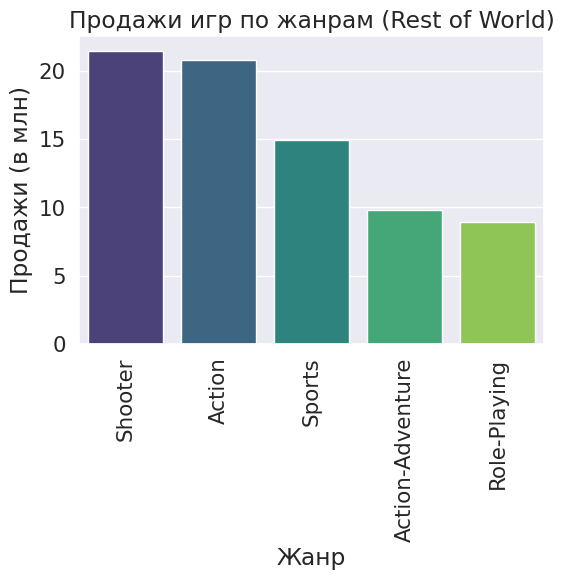

In [142]:
genre_sales = df1.groupby('Genre')['Global'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis") # попробовал добавить параметр palette
plt.title('Продажи игр по жанрам')
plt.ylabel('Продажи (в млн)')
plt.xlabel('Жанр')
plt.xticks(rotation=90) # подписи не помещались, нашел параметр который поворачивает их


# чтобы не рисовать фигуру для каждого региона попробовал сделать через цикл.
def plot_sales_by_region(df, region):
    genre_sales = df1.groupby('Genre')[region].sum().sort_values(ascending=False).head(5)

    plt.figure(figsize=(6, 4))
    sns.barplot(x=genre_sales.index, y=genre_sales.values, palette="viridis") # попробовал добавить параметр palette
    plt.title(f'Продажи игр по жанрам ({region})')
    plt.ylabel('Продажи (в млн)')
    plt.xlabel('Жанр')
    plt.xticks(rotation=90)
    plt.show()

regions = ['Global', 'Europe', 'North America', 'Japan', 'Rest of World']
for region in regions:
    plot_sales_by_region(df1, region)


In [121]:
file_path = "/content/drive/My Drive/ML/archive/Video_Games_Sales_as_at_22_Dec_2016.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')
pd.set_option('display.max_columns', None)  # показывать все столбцы
pd.set_option('display.expand_frame_repr', False)  # не переносить на другую строку
print(df.head(10))

                        Name Platform  Year_of_Release         Genre Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  Critic_Count  User_Score  User_Count Developer Rating
0                 Wii Sports      Wii           2006.0        Sports  Nintendo     41.36     28.96      3.77         8.45         82.53          76.0          51.0         8.0       322.0  Nintendo      E
1          Super Mario Bros.      NES           1985.0      Platform  Nintendo     29.08      3.58      6.81         0.77         40.24           NaN           NaN         NaN         NaN       NaN    NaN
2             Mario Kart Wii      Wii           2008.0        Racing  Nintendo     15.68     12.76      3.79         3.29         35.52          82.0          73.0         8.3       709.0  Nintendo      E
3          Wii Sports Resort      Wii           2009.0        Sports  Nintendo     15.61     10.93      3.28         2.95         32.77          80.0          73.0         8.0     

Хотел проверить гипотезу о том, зависят ли продажи от оценок критиков.
Корреляция между оценками критиков и глобальными продажами: 0.25 - зависимость слабая.
Аналогично проверил относительно оценок пользователей - зависимости почти нет.

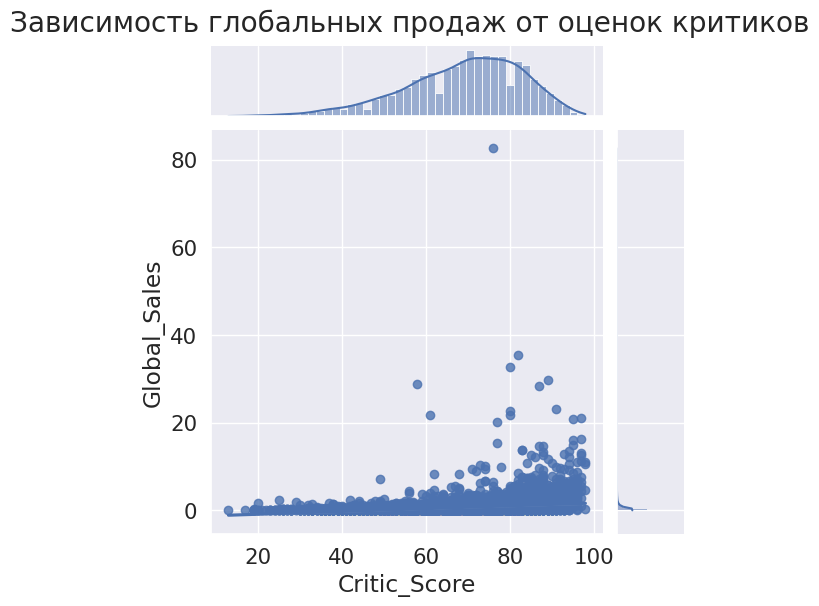

Корреляция между оценками критиков и глобальными продажами: 0.25


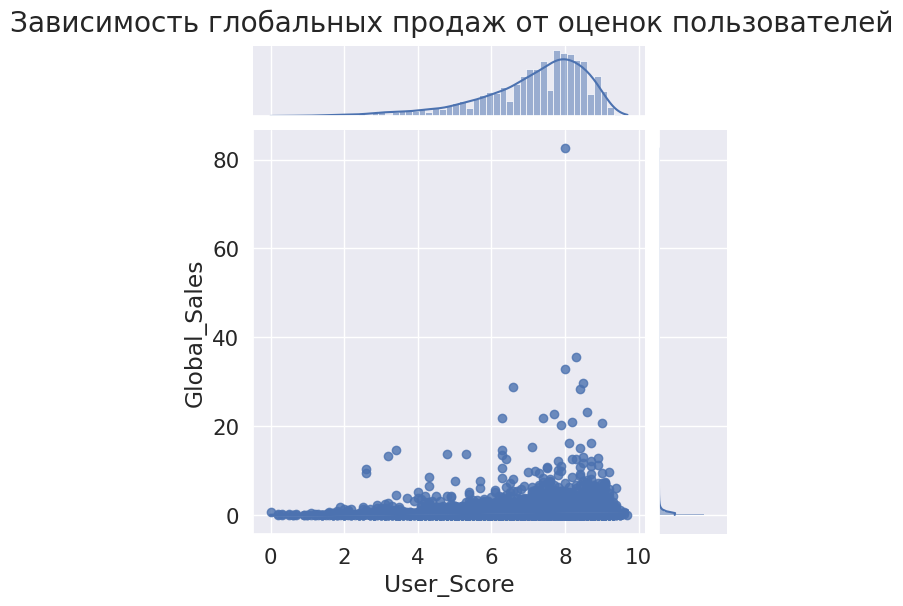

Корреляция между оценками пользователей и глобальными продажами: 0.09


In [131]:
filtered_data_critic = df.dropna(subset=['Critic_Score', 'Global_Sales'])

sns.jointplot(x=filtered_data_critic['Critic_Score'], y=filtered_data_critic['Global_Sales'], kind='reg') # у Вас на лекции явно не указываются оси (x=...,y=...) у мея если я не указываю почему-то ошибка
plt.suptitle('Зависимость глобальных продаж от оценок критиков', y=1.02)
correlation_critic = filtered_data_critic['Critic_Score'].corr(filtered_data_critic['Global_Sales'])
plt.show()
print(f"Корреляция между оценками критиков и глобальными продажами: {correlation_critic:.2f}")


filtered_data_user = df.dropna(subset=['User_Score', 'Global_Sales'])

sns.jointplot(x=filtered_data_user['User_Score'], y=filtered_data_user['Global_Sales'], kind='reg') # у Вас на лекции явно не указываются оси (x=...,y=...) у мея если я не указываю почему-то ошибка
plt.suptitle('Зависимость глобальных продаж от оценок пользователей', y=1.02)
plt.show()
correlation_user = filtered_data_user['User_Score'].corr(filtered_data_user['Global_Sales'])
print(f"Корреляция между оценками пользователей и глобальными продажами: {correlation_user:.2f}")


Тогда попробовал построить матрицу корреляций чтобы посмотреть какие зависимости есть.
Какие-то зависимости вижу только между глобальными продажами и продажами по регионам (что очевидно).

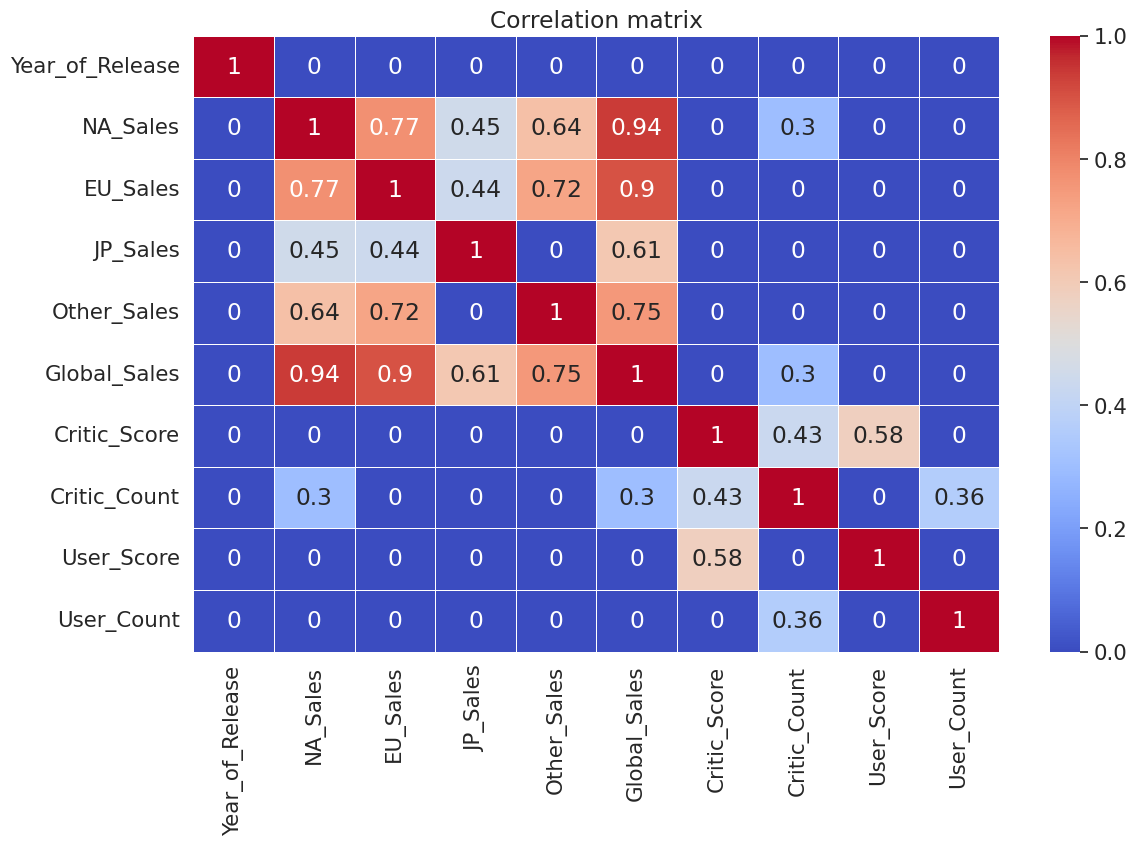

In [135]:
plt.figure(figsize=(13, 8))

sns.set(font_scale=1.4)

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

Проанализировал количество продаж по регионам и убедился.
Чем больше кол-во продаж в регионе - тем больше коэффициент корреляция между продажами в регионе и глобальными продажами.

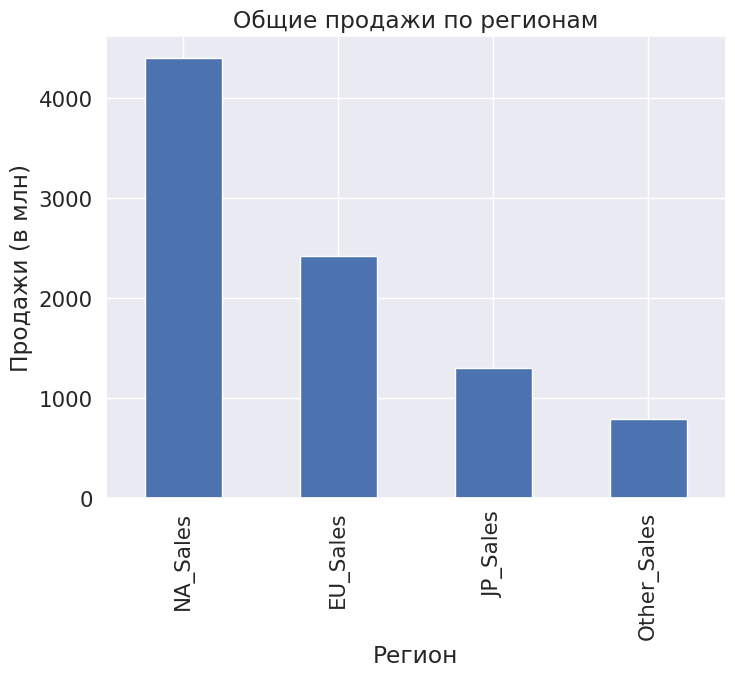

In [138]:
sales_by_region = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

sales_by_region.plot(kind='bar', figsize=(8,6))
plt.title('Общие продажи по регионам')
plt.ylabel('Продажи (в млн)')
plt.xlabel('Регион')
plt.show()


Тут решил проанализировать доли продаж по издательствам игр.
Топ-5 издательств продают более 50% игр.

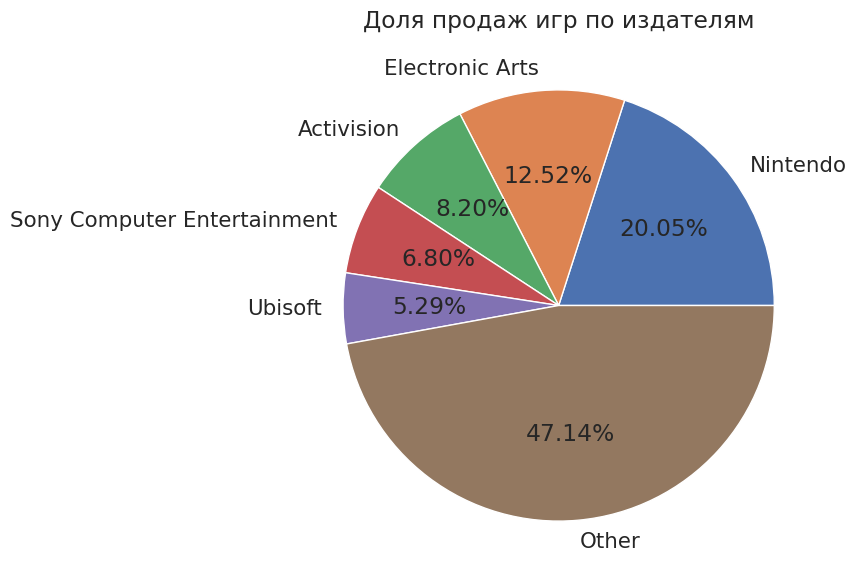

In [139]:
all_publishers_sales = df.groupby('Publisher')['Global_Sales'].sum()
top_5_publishers_sales = all_publishers_sales.nlargest(5)

total_sales = df['Global_Sales'].sum()

other_publishers_sales = total_sales - top_5_publishers_sales.sum()

top_5_publishers_sales['Other'] = other_publishers_sales

plt.figure(figsize=(12, 7))
top_5_publishers_sales.plot.pie(autopct='%.2f%%')
plt.title('Доля продаж игр по издателям')
plt.ylabel('')

plt.show()
